# 부산 지하철 이용객 분석

1. http://data.busan.go.kr 접속
2. 승하차 인원 정보 검색(시간대별 승하차 인원 20240930.csv)

데이터 분석의 3대장

matplotlid - 시각화 도구

pandas - 데이터프레임

numpy - 숫자, 행렬

In [9]:
#!python -m pip install matplotlib
#!python -m pip install pandas
#!python -m pip install numpy
#!python -m pip install squarify

You should consider upgrading via the '/Users/jin/.pyenv/versions/3.9.10/bin/python -m pip install --upgrade pip' command.


In [8]:
#시각화 도구
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#데이 프레임 
import pandas as pd

# import squartify

In [67]:
# 차트 스타일 
plt.style.use('fivethirtyeight')

# 폰트 설정 
d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams["font.family"] = 'D2Coding'

#마이너 부호 깨지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [37]:
file_path = './data_set/일별 역별 시간대별 승하차(2024년 5월).csv'
data = pd.read_csv(file_path, encoding='EUC-KR')
data.tail()

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
34043,414,안평,2024-05-29,수,하차,2220,0,0,0,1,...,138,168,190,221,138,88,81,62,40,19
34044,414,안평,2024-05-30,목,승차,2335,0,0,0,11,...,145,165,215,163,64,43,17,13,4,0
34045,414,안평,2024-05-30,목,하차,2245,0,0,0,1,...,148,132,233,191,124,94,55,51,32,29
34046,414,안평,2024-05-31,금,승차,2276,0,0,0,4,...,140,163,235,165,72,44,25,12,11,1
34047,414,안평,2024-05-31,금,하차,2138,0,0,0,0,...,145,145,182,192,119,94,62,79,36,28


In [38]:
columns = ["num", "stationName","date","week","type", "total"]
time_col = [f"{i}~{i+1}H" for i in range(1,24)]
columns = columns + time_col + ['24~01H']
#print(columns)
data.columns = columns
data.head(10)

,num,stationName,date,week,type,total,1~2H,2~3H,3~4H,4~5H,...,15~16H,16~17H,17~18H,18~19H,19~20H,20~21H,21~22H,22~23H,23~24H,24~01H
0,95,다대포해수욕장,2024-01-01,월,승차,8587,0,0,0,12,...,585,537,468,266,162,84,111,70,16,0
1,95,다대포해수욕장,2024-01-01,월,하차,8377,0,4,0,1,...,363,369,303,192,127,92,97,54,42,31
2,95,다대포해수욕장,2024-01-02,화,승차,4882,0,1,1,16,...,458,422,374,221,142,85,72,50,14,0
3,95,다대포해수욕장,2024-01-02,화,하차,4056,2,0,0,2,...,339,325,281,362,253,135,120,94,90,53
4,95,다대포해수욕장,2024-01-03,수,승차,4663,0,0,0,20,...,369,303,358,241,115,91,70,70,17,0
5,95,다대포해수욕장,2024-01-03,수,하차,3707,0,0,0,1,...,264,327,296,347,260,141,136,109,62,46
6,95,다대포해수욕장,2024-01-04,목,승차,4950,3,2,0,20,...,502,441,339,228,146,105,62,66,16,0
7,95,다대포해수욕장,2024-01-04,목,하차,4197,4,2,1,2,...,350,296,298,359,236,157,157,114,66,48
8,95,다대포해수욕장,2024-01-05,금,승차,5180,0,0,0,19,...,506,377,399,282,148,117,83,73,11,0
9,95,다대포해수욕장,2024-01-05,금,하차,4342,0,0,0,0,...,321,316,338,350,237,172,134,124,103,68


In [43]:
gdata = data.groupby(["num", "stationName", "week","date"]).sum().reset_index() #그룹하 승합차 합친 수 인덱 초기화
gdata[gdata['date']== "2024-01-01"] #test 확인 
#gdata.head()

,num,stationName,week,date,type,total,1~2H,2~3H,3~4H,4~5H,...,15~16H,16~17H,17~18H,18~19H,19~20H,20~21H,21~22H,22~23H,23~24H,24~01H
66,95,다대포해수욕장,월,2024-01-01,승차하차,16964,0,4,0,13,...,948,906,771,458,289,176,208,124,58,31
218,96,다대포항,월,2024-01-01,승차하차,4573,0,0,0,1,...,392,369,314,228,204,136,113,91,51,22
370,97,낫개,월,2024-01-01,승차하차,6281,0,0,0,3,...,462,497,419,344,247,247,213,159,82,32
522,98,신장림,월,2024-01-01,승차하차,3796,0,0,0,8,...,308,247,212,192,156,105,92,78,50,14
674,99,장림,월,2024-01-01,승차하차,4069,0,0,0,2,...,307,318,311,212,149,132,117,80,42,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16330,410,석대,월,2024-01-01,승차하차,193,0,0,0,0,...,29,21,14,7,2,1,2,0,0,1
16482,411,영산대,월,2024-01-01,승차하차,2801,0,0,0,4,...,246,246,229,167,104,121,72,87,82,37
16634,412,윗반송,월,2024-01-01,승차하차,2787,0,0,0,8,...,227,267,202,183,85,81,85,51,31,20
16786,413,고촌,월,2024-01-01,승차하차,723,0,0,1,2,...,63,56,63,38,17,13,16,8,8,3


In [46]:
#각 역마다 일자별 정리 
mydata = gdata[["stationName","date","total"]]
mydata = mydata.sort_values(by=["stationName","date"],ascending=[True, True])
mydata.tail()

,stationName,date,total
9186,가야,2024-01-01,3999
9250,가야,2024-01-02,7354
9164,가야,2024-01-03,7499
9142,가야,2024-01-04,7678
9120,가야,2024-01-05,7844


In [49]:
#데이터 날짜별로 통합 
date_popular = mydata.sort_values(by=['date','stationName'],ascending=[True, True])[['date','stationName','total']]
date_popular.head()

,date,stationName,total
9186,2024-01-01,가야,3999
9946,2024-01-01,감전,3054
14658,2024-01-01,강서구청,1993
9490,2024-01-01,개금,8022
13290,2024-01-01,거제,5043


In [59]:
#역 이름 기준으 날짜를 통합하 total을
total_popular = mydata.groupby(['stationName']).sum().reset_index()[['stationName','total']]
total = total_popular.sort_values(by="total", ascending=False)
total.head(10)

,stationName,total
70,서면,18632891
83,연산,8167643
61,부산역,7016988
65,사상,6678606
36,동래,5959163
72,센텀시티,5744617
104,하단,5663205
23,남포,5653415
88,자갈치,5487259
33,덕천,5265420


In [ ]:
from IPython.display import display, HTML
display(HTML(f'''
    <div style="display: flex">
        <div style="flex: 1; padding:10px">
            <h3>Total Popular</h3>
            {total.to_html(index=False)}
    </div>
        <div style="flex: 1; padding: 10px">
            <h3>Date Popular</h3>
            {date_popular.to_html(index=False)}
        </div>
</div>
'''))

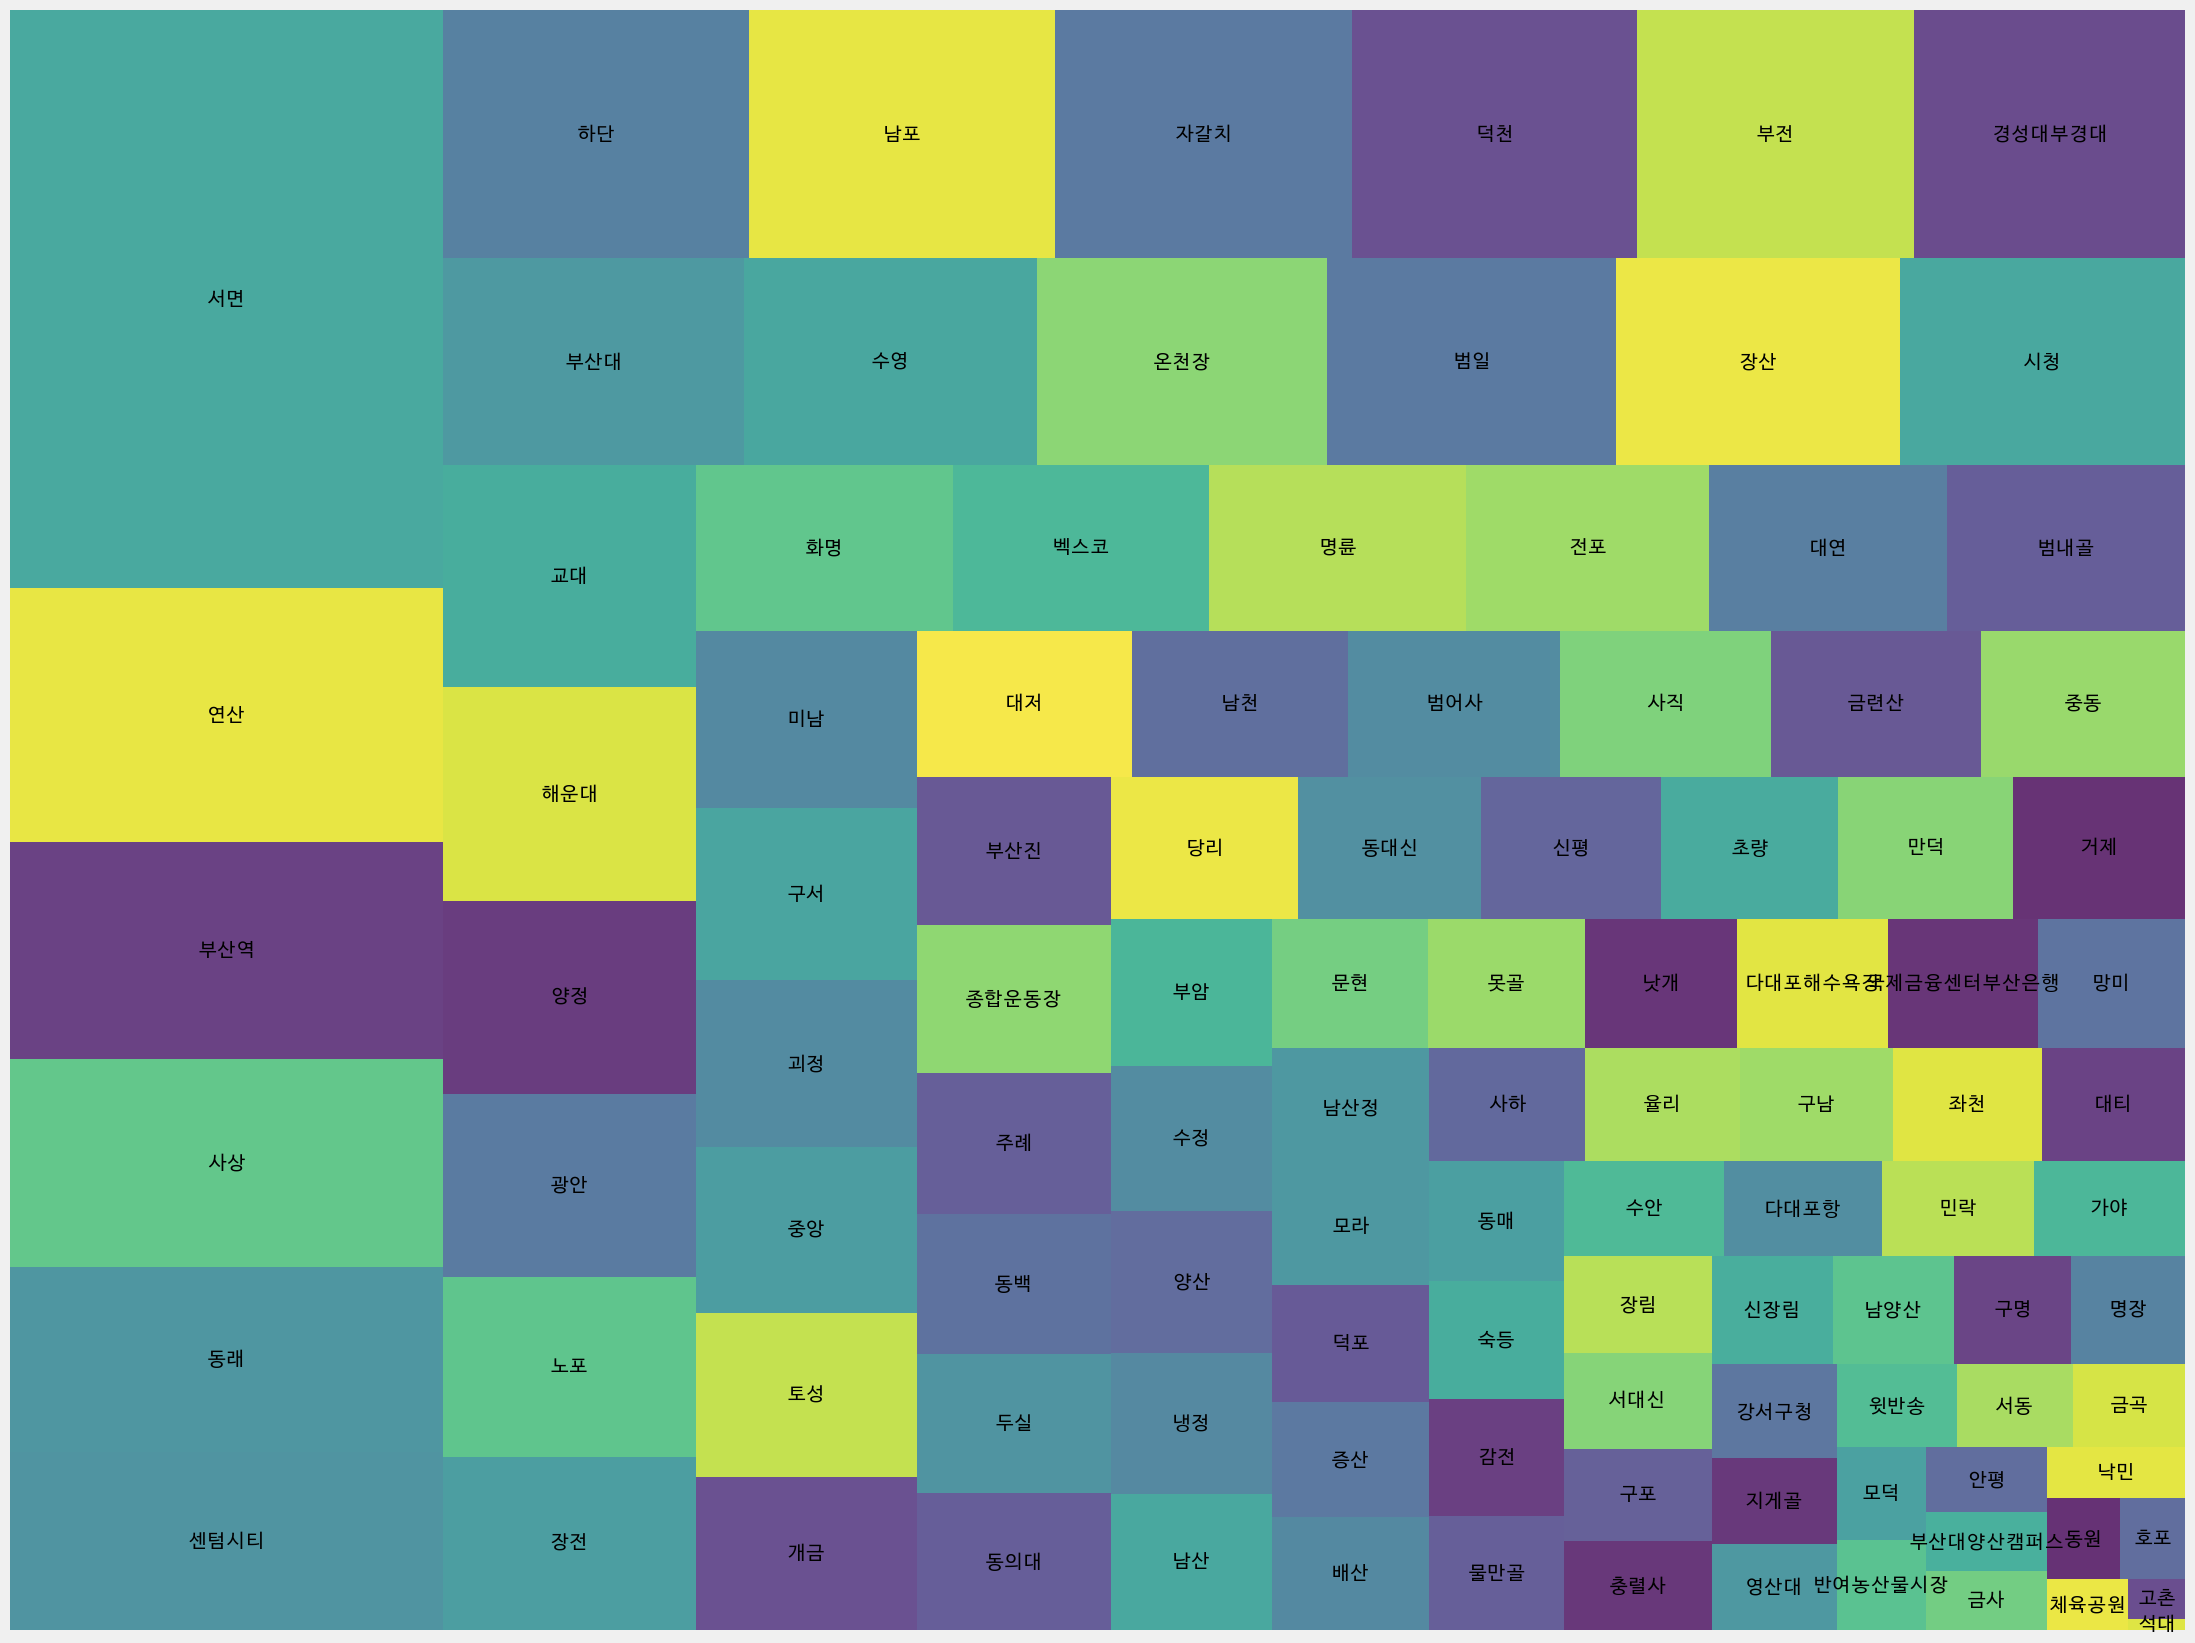

In [68]:
#시각화
import squarify
plt.figure(figsize=(25,20))

squarify.plot(size=total['total'], label=total.stationName, alpha = 0.8)
plt.gca().invert_yaxis()
plt.axis('off
plt.show()

In [71]:
file_path = './data_set/seoul/서울교통공사_역별 일별 시간대별 승하차인원 정보_20231231.csv'
data = pd.read_csv(file_path, encoding='EUC-KR')
data.head()

,연번,수송일자,호선,역번호,역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2023-01-01,1호선,150,서울역,승차,215,145,231,594,...,2655,2509,2696,2549,2462,2177,2190,1808,734,7
1,2,2023-01-01,1호선,150,서울역,하차,154,636,595,939,...,2282,2295,2526,1930,1897,1487,991,609,280,46
2,3,2023-01-01,1호선,151,시청,승차,48,73,106,194,...,843,895,959,985,670,630,515,330,146,0
3,4,2023-01-01,1호선,151,시청,하차,64,247,293,463,...,602,575,533,456,285,267,246,154,79,18
4,5,2023-01-01,1호선,152,종각,승차,407,235,158,201,...,1145,1402,1223,1272,911,913,906,602,232,3


In [74]:
cs = ["num", "stationName","date","week","type", "total"]
time_col = [f"{i}~{i+1}H" for i in range(1,24)]
columns = columns + time_col + ['24~01H']
#print(columns)
data.cs = cs
data.head(10)

,연번,수송일자,호선,역번호,역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2023-01-01,1호선,150,서울역,승차,215,145,231,594,...,2655,2509,2696,2549,2462,2177,2190,1808,734,7
1,2,2023-01-01,1호선,150,서울역,하차,154,636,595,939,...,2282,2295,2526,1930,1897,1487,991,609,280,46
2,3,2023-01-01,1호선,151,시청,승차,48,73,106,194,...,843,895,959,985,670,630,515,330,146,0
3,4,2023-01-01,1호선,151,시청,하차,64,247,293,463,...,602,575,533,456,285,267,246,154,79,18
4,5,2023-01-01,1호선,152,종각,승차,407,235,158,201,...,1145,1402,1223,1272,911,913,906,602,232,3
5,6,2023-01-01,1호선,152,종각,하차,69,164,268,384,...,904,890,807,564,391,267,207,149,136,15
6,7,2023-01-01,1호선,153,종로3가,승차,220,171,121,155,...,1329,1392,1338,1080,879,763,664,477,163,6
7,8,2023-01-01,1호선,153,종로3가,하차,39,118,130,274,...,1013,839,621,454,316,227,201,122,90,31
8,9,2023-01-01,1호선,154,종로5가,승차,46,48,79,101,...,1066,1010,1020,875,592,572,382,177,65,0
9,10,2023-01-01,1호선,154,종로5가,하차,26,84,130,216,...,851,742,592,438,304,195,174,152,95,10
